# Importing Keras Libraries and Modules

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


#Importing Cifar10 dataset

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


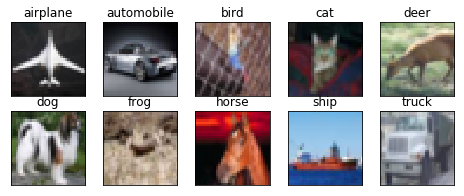

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Implemented


1.   Normal Convolution
2.   Spatially Seperable Convolution
3.   Grouped Convolution
4.   Grouped Convolution with dilation
5.   Depthwise Convolution



In [8]:
from keras.layers import Input, Conv2D, SeparableConv2D, DepthwiseConv2D, AveragePooling2D, Concatenate, BatchNormalization, MaxPooling2D
from keras import regularizers
from keras.models import Model
from keras.layers.merge import concatenate

model_input = Input(shape=(32, 32, 3))

#BLOCK 1 : Normal Convolution and Seperable Convolution
layer1 = Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(model_input)
layer1 = BatchNormalization()(layer1) #32

#Spatially Seperable Convolution
layer1_1 = Conv2D(64, (3, 1), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(layer1)
layer1_2 = Conv2D(64, (1, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(layer1_1)
layer2 = BatchNormalization()(layer1_2)

layer3 = SeparableConv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001))(layer2)
layer3 = BatchNormalization()(layer3) #32

layer3 = MaxPooling2D((2,2))(layer3) #16
layer3 = Dropout(0.5)(layer3)

#BLOCK 2 : Grouped Convolution
layer4 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(layer3)
layer4 = BatchNormalization()(layer4) #16

layer5 = Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(layer3)
layer5 = BatchNormalization()(layer5) #16

layer6 = concatenate([layer4,layer5])

layer6 = MaxPooling2D((2,2))(layer6) #8
layer6 = Dropout(0.5)(layer6)


#BLOCK 3 : Grouped Convolution with dilation
layer7 = Conv2D(256, (3, 3), dilation_rate=(1, 1), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001))(layer6)
layer7 = BatchNormalization()(layer7) #8

layer8 = Conv2D(256, (3, 3), dilation_rate=(2, 2), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001))(layer6)
layer8 = BatchNormalization()(layer8) #8

layer9 = concatenate([layer7,layer8])

#BLOCK 4: Depthwise Convolution
layer10 = SeparableConv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001))(layer9)
layer10 = BatchNormalization()(layer10) #8

layer10 = MaxPooling2D((2,2))(layer10) #6
layer10 = Dropout(0.5)(layer10)

layer10 = Conv2D(10, (1, 1), activation='relu')(layer10) #4
layer10 = AveragePooling2D(4,4)(layer10)
layer10 = Flatten()(layer10)
layer10 = Activation(activation='softmax')(layer10)

model = Model(model_input, layer10, name='grouped_cnn')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0616 17:07:30.801832 140220684273536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0616 17:07:30.813071 140220684273536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 32, 32, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 32, 32, 64)   256         conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 32, 32, 64)   12352       batch_normalization_8[0][0]      
__________________________________________________________________________________________________
conv2d_10 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  app.launch_new_instance()
W0616 17:07:47.158405 140220684273536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.

Epoch 1/50
390/390 [==============================] - 32s 81ms/step - loss: 1.9706 - acc: 0.5247 - val_loss: 2.8309 - val_acc: 0.3789

Epoch 00001: val_acc improved from -inf to 0.37890, saving model to assignment6_model_B.h5
Epoch 2/50
390/390 [==============================] - 26s 65ms/step - loss: 1.3650 - acc: 0.6752 - val_loss: 1.4076 - val_acc: 0.6633

Epoch 00002: val_acc improved from 0.37890 to 0.66330, saving model to assignment6_model_B.h5
Epoch 3/50
390/390 [==============================] - 25s 63ms/step - loss: 1.1930 - acc: 0.7325 - val_loss: 1.6939 - val_acc: 0.6038

Epoch 00003: val_acc did not improve from 0.66330
Epoch 4/50
390/390 [==============================] - 25s 63ms/step - loss: 1.1269 - acc: 0.7585 - val_loss: 1.6220 - val_acc: 0.6477

Epoch 00004: val_acc did not improve from 0.66330
Epoch 5/50
390/390 [==============================] - 25s 64ms/step - loss: 1.0915 - acc: 0.7771 - val_loss: 1.2170 - val_acc: 0.7473

Epoch 00005: val_acc improved from 0.663

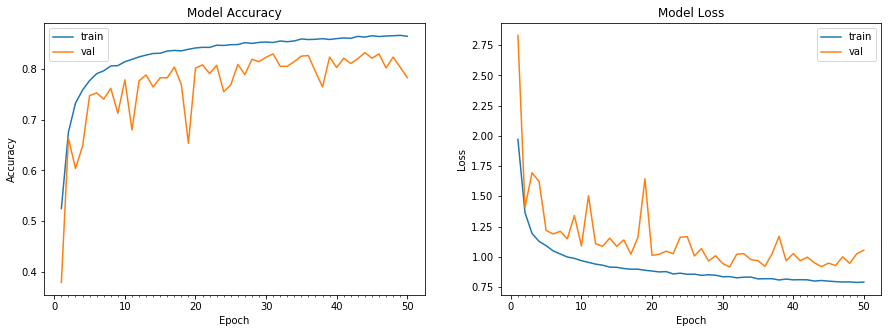

Accuracy on test data is: 83.24


In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

checkpointer = ModelCheckpoint(filepath='assignment6_model_B.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpointer])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
# Load the weights with the best validation accuracy:
model.load_weights('assignment6_model_B.h5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))